# Final Capstone Project

In [1]:
### Importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import string
import re
from string import punctuation
import warnings
warnings.filterwarnings('ignore') 

# Loading Cleaned Datasets

In [2]:
train_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_train_data.csv')
test_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_test_data.csv')
test_hidden_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_test_hidden_data.csv')

In [3]:
# Get the Shape of all datasets in one frame
train_data.shape, test_data.shape, test_hidden_data.shape

((3932, 11), (994, 10), (994, 11))

In [4]:
# Get Datasets features in one frame
train_data.columns , test_data.columns , test_hidden_data.columns

(Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'sentiment', 'reviews_day', 'reviews_month', 'reviews_year'],
       dtype='object'),
 Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'reviews_day', 'reviews_month', 'reviews_year'],
       dtype='object'),
 Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'sentiment', 'reviews_day', 'reviews_month', 'reviews_year'],
       dtype='object'))

In [5]:
# Get the columns_values
train_data.count()

Name of the product    3932
Product Brand          3932
categories             3932
primaryCategories      3932
reviews_date           3932
reviews_text           3932
reviews_title          3878
sentiment              3932
reviews_day            3932
reviews_month          3932
reviews_year           3932
dtype: int64

In [6]:
# Get the columns_values
test_data.count()

Name of the product    994
Product Brand          994
categories             994
primaryCategories      994
reviews_date           994
reviews_text           994
reviews_title          984
reviews_day            994
reviews_month          994
reviews_year           994
dtype: int64

In [7]:
# Get the columns_values
test_hidden_data.count()

Name of the product    994
Product Brand          994
categories             994
primaryCategories      994
reviews_date           994
reviews_text           994
reviews_title          984
sentiment              994
reviews_day            994
reviews_month          994
reviews_year           994
dtype: int64

In [8]:
train_data.describe()

,reviews_day,reviews_month,reviews_year
count,3932.000000,3932.000000,3932.000000
mean,15.758138,6.003815,2016.854781
std,8.607425,4.386473,0.674061
min,1.000000,1.000000,2014.000000
25%,8.000000,2.000000,2016.000000
50%,16.000000,5.000000,2017.000000
75%,23.000000,11.000000,2017.000000
max,31.000000,12.000000,2018.000000


#   Exploratory Data Analysis (EDA):

In [9]:
train_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26,purchased black fridaypros great price even sa...,powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20,just average alexa option doe show thing scree...,average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04,very good product exactly what wanted very goo...,greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23,this purchased bought niece other case compare...,very durable,Positive,23,1,2017


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  3932 non-null   object
 1   Product Brand        3932 non-null   object
 2   categories           3932 non-null   object
 3   primaryCategories    3932 non-null   object
 4   reviews_date         3932 non-null   object
 5   reviews_text         3932 non-null   object
 6   reviews_title        3878 non-null   object
 7   sentiment            3932 non-null   object
 8   reviews_day          3932 non-null   int64 
 9   reviews_month        3932 non-null   int64 
 10  reviews_year         3932 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 338.0+ KB


In [11]:
# Check the duplicate values
train_data.duplicated().sum()

2

In [12]:
# Remove duplicates
train_data = train_data.drop_duplicates()

# Get the results
train_data.duplicated().sum()

0

In [13]:
# Selecting columns necesary for sentiment analysis 
train = train_data[["reviews_text", "sentiment"]]
hidden = test_hidden_data[["reviews_text", "sentiment"]]

## Sentiment Distribution

In [14]:
# Check the exact counts of each sentiment category 
sentiment_counts = train_data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


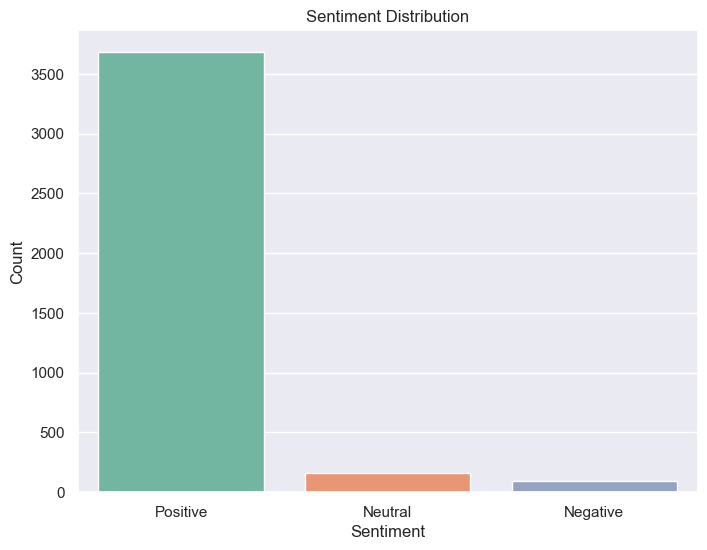

In [15]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Check Class Imbalance 

In [16]:
# Get the count of each sentiment category
class_counts = train_data['sentiment'].value_counts()
print(class_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


In [17]:
# Calculate class imbalance percentage
class_percentage = train_data['sentiment'].value_counts(normalize=True) * 100
print(class_percentage)

sentiment
Positive    93.689567
Neutral      4.020356
Negative     2.290076
Name: proportion, dtype: float64


<Axes: ylabel='count'>

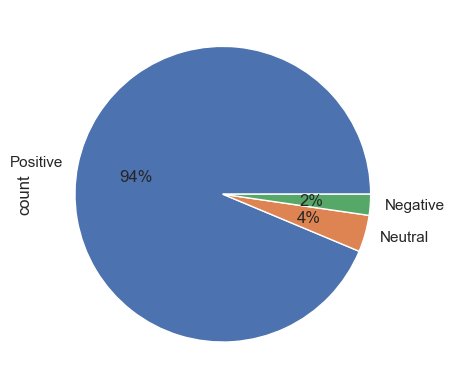

In [18]:
# Draw the Pie_plot 
train_data['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

## Bar Chart

In [19]:
# Textual Analysis for Common Words in Reviews
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the reviews into a frequency matrix
X = vectorizer.fit_transform(train_data['reviews_text'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

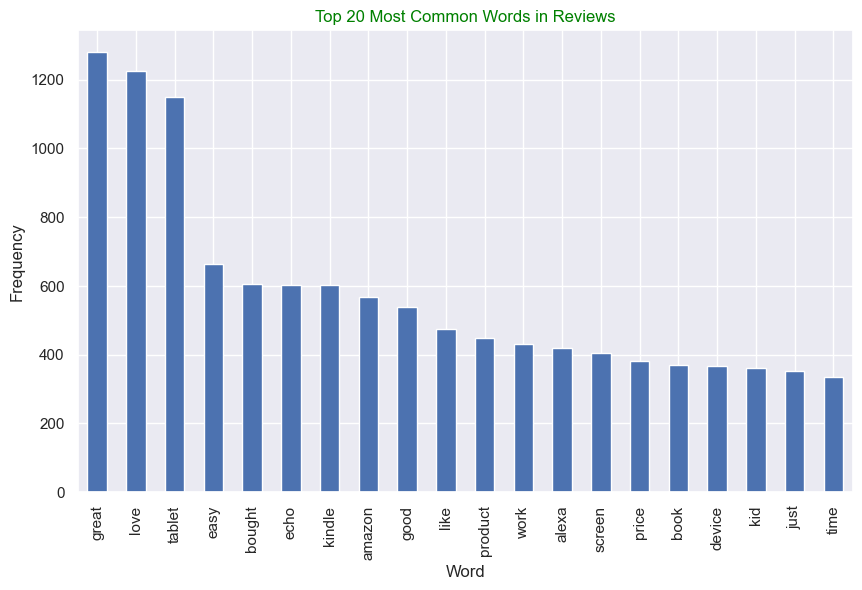

In [20]:
# Calculate word frequencies and plot the top 20 most common words
word_freq_sum = word_freq.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
word_freq_sum.head(20).plot(kind='bar')
plt.title('Top 20 Most Common Words in Reviews', color='green')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

## Sentiment Distribution by Length of Review

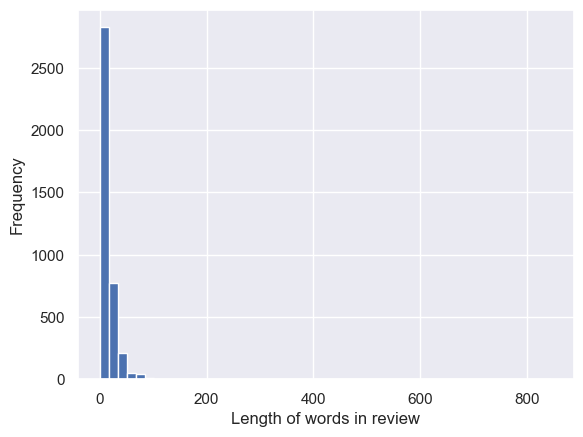

In [21]:
# Analysis of words in reviews
words_per_review = train_data["reviews_text"].apply(lambda x : len(x.split()))
words_per_review.hist(bins=50)
plt.xlabel('Length of words in review')
plt.ylabel("Frequency")
plt.show()

In [22]:
words_per_review.mean()

16.450127226463103

### Note

Each preprocessed review has an average of 19 words, and most of the reviews have less than 50 words.

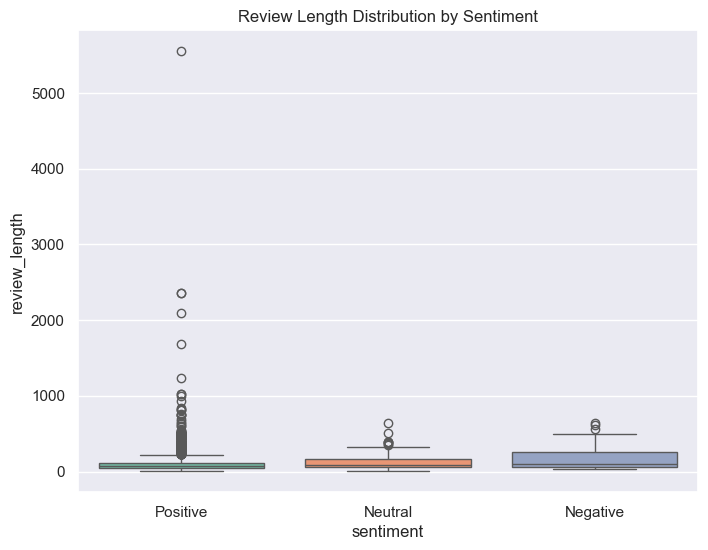

In [23]:
# Examine the distribution of review lengths for each sentiment category

# Create a new column for review length
train_data['review_length'] = train_data['reviews_text'].apply(len)

# Boxplot to show review length distribution by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='sentiment', y='review_length', palette='Set2')
plt.title('Review Length Distribution by Sentiment')
plt.show()

## Word Cloud Analysis

In [24]:
from wordcloud import WordCloud

# Creating the word cloud for each sentiments  
positive_sentiments = train_data[train_data["sentiment"]=="Positive"]
negative_sentiments = train_data[train_data["sentiment"]=="Negative"]
neutral_sentiments= train_data[train_data["sentiment"]=="Neutral"]

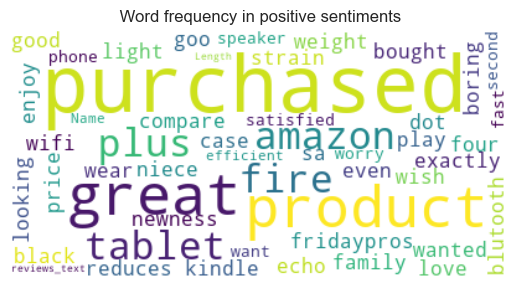

In [25]:
# Create a word cloud for positive reviews
word_cloud_text = positive_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in positive sentiments")
plt.axis("off")
plt.show()

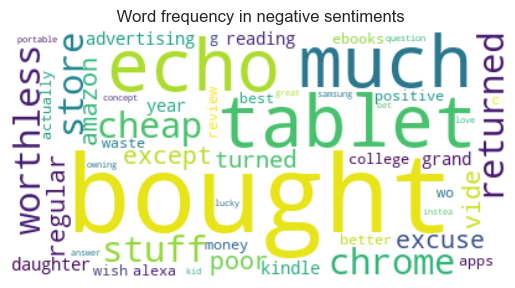

In [26]:
# Create a word cloud for Negative reviews
word_cloud_text = negative_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in negative sentiments")
plt.axis("off")
plt.show()

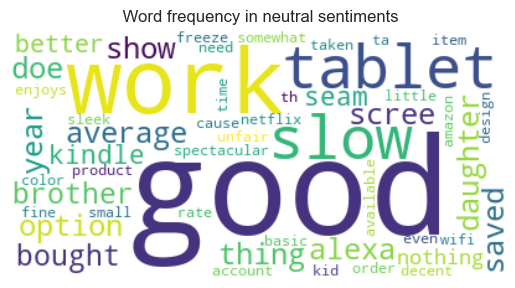

In [27]:
# Create a word cloud for Neutral reviews
word_cloud_text = neutral_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))
                                           
# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in neutral sentiments")
plt.axis("off")
plt.show()

# Feature Engineering:

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
train_data.head(2)

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment,reviews_day,reviews_month,reviews_year,review_length
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26,purchased black fridaypros great price even sa...,powerful tablet,Positive,26,12,2016,306
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,Positive,17,1,2018,399


In [30]:
train.head(5)

,reviews_text,sentiment
0,purchased black fridaypros great price even sa...,Positive
1,purchased amazon echo plus dot plus four fire ...,Positive
2,just average alexa option doe show thing scree...,Neutral
3,very good product exactly what wanted very goo...,Positive
4,this purchased bought niece other case compare...,Positive


In [31]:
hidden.head(5)

,reviews_text,sentiment
0,amazon kindle fire free used that want online ...,Positive
1,echo show great addition amazon family work ju...,Positive
2,great value from best bought christmas sale,Positive
3,mine email facebook game line also have down l...,Positive
4,this fantastic item person bought love,Positive


## TF-IDF Vectorizer

In [94]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2) )

# Transform the review text
X = tfidf_vectorizer.fit_transform(train['reviews_text'])  # Assuming the column with text is 'review'
y = train['sentiment']

# Classifier Selection: Multinomial Naive Bayes

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9397794741306191
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.04      0.08        23
     Neutral       0.00      0.00      0.00        49
    Positive       0.94      1.00      0.97      1107

    accuracy                           0.94      1179
   macro avg       0.65      0.35      0.35      1179
weighted avg       0.90      0.94      0.91      1179



# Tackling Class Imbalance

## Applying SMOTE for Balancing oversampling

In [34]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Naive Bayes classifier on the resampled data
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = nb_classifier.predict(X_test)

# Evaluate the model performance after SMOTE
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_resampled))

Accuracy after SMOTE: 0.8490245971162002
Classification Report after SMOTE:
               precision    recall  f1-score   support

    Negative       0.17      0.48      0.25        23
     Neutral       0.17      0.37      0.23        49
    Positive       0.97      0.88      0.92      1107

    accuracy                           0.85      1179
   macro avg       0.43      0.57      0.47      1179
weighted avg       0.92      0.85      0.88      1179



# undersampling

In [35]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Train the Naive Bayes classifier on the undersampled data
nb_classifier.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = nb_classifier.predict(X_test)

# Evaluate the model performance after undersampling
print("Accuracy after Undersampling:", accuracy_score(y_test, y_pred_under))
print("Classification Report after Undersampling:\n", classification_report(y_test, y_pred_under))


Accuracy after Undersampling: 0.5691263782866837
Classification Report after Undersampling:
               precision    recall  f1-score   support

    Negative       0.07      0.57      0.12        23
     Neutral       0.08      0.55      0.14        49
    Positive       0.99      0.57      0.72      1107

    accuracy                           0.57      1179
   macro avg       0.38      0.56      0.33      1179
weighted avg       0.93      0.57      0.69      1179



# Evaluation Metrics: Precision, Recall, F1-Score, AUC-ROC

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_resampled, average='weighted')
recall = recall_score(y_test, y_pred_resampled, average='weighted')
f1 = f1_score(y_test, y_pred_resampled, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9174
Recall: 0.8490
F1-Score: 0.8782


# AUC-ROC Curve

AUC-ROC: 0.7642


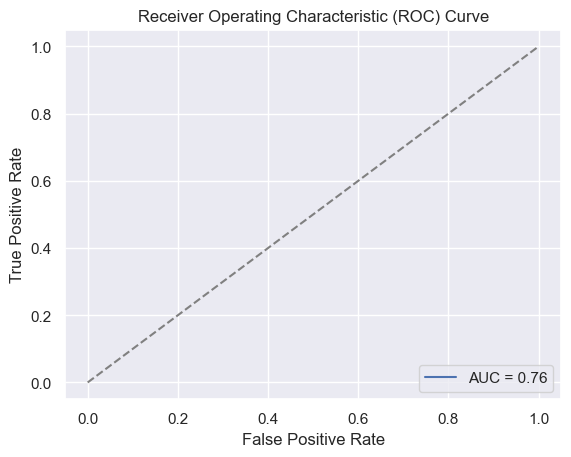

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities on the test set
y_prob = nb_classifier.predict_proba(X_test)

# Compute AUC-ROC
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"AUC-ROC: {auc:.4f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label='positive')  # Adjust index for multi-class
plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Week 3 & 4: Model Selection and Advanced Techniques

# Multi-class Support Vector Machines (SVM)

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [39]:
# Assuming you've already processed your data (X, y) using TF-IDF

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train SVM
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9440203562340967
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.30        23
           1       1.00      0.04      0.08        49
           2       0.94      1.00      0.97      1107

    accuracy                           0.94      1179
   macro avg       0.98      0.40      0.45      1179
weighted avg       0.95      0.94      0.92      1179



# Neural Networks for Text Classification (Deep Learning)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 sentiment classes

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test.toarray(), y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9048 - loss: 0.7216 - val_accuracy: 0.9389 - val_loss: 0.2490
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9446 - loss: 0.2078 - val_accuracy: 0.9389 - val_loss: 0.2267
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9388 - loss: 0.1687 - val_accuracy: 0.9389 - val_loss: 0.2182
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9343 - loss: 0.1393 - val_accuracy: 0.9389 - val_loss: 0.2274
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9361 - loss: 0.1184 - val_accuracy: 0.9389 - val_loss: 0.2481
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9603 - loss: 0.0854 - val_accuracy: 0.9338 - val_loss: 0.2726
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9796 - loss: 0.0598 - val_accuracy: 0.9355 - val_loss: 0.3055
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9911 - loss: 0.0333 - val_accuracy: 0.9355 - v

# Ensemble Techniques: XGBoost with Naive Bayes

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

# Apply SMOTE to balance class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Train XGBoost
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = xgb_classifier.predict(X_test)
print(f"Accuracy with XGBoost: {accuracy_score(y_test, y_pred)}")

Accuracy with XGBoost: 0.9312977099236641


# Advanced Feature Engineering: Sentiment Score

## Create Sentiment Score Feature using VADER

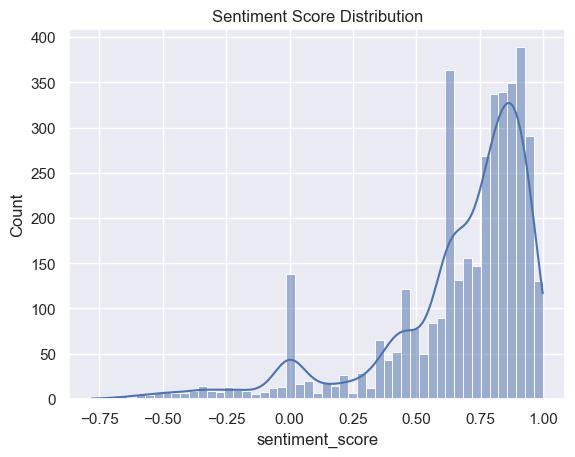

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Create a new feature column based on sentiment score
train['sentiment_score'] = train['reviews_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize the sentiment score distribution
sns.histplot(train['sentiment_score'], kde=True)
plt.title('Sentiment Score Distribution')
plt.show()


# Integrate the sentiment score into your feature set

In [43]:
# Add sentiment score as an additional feature
X_with_sentiment_score = X.copy().toarray()
X_with_sentiment_score = np.hstack((X_with_sentiment_score, train['sentiment_score'].values.reshape(-1, 1)))

In [44]:
X_with_sentiment_score

array([[ 0.        ,  0.11556995,  0.        , ...,  0.        ,
         0.        ,  0.967     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.9606    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2263    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.2732    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.2903    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.7328    ]])

In [45]:
X_with_sentiment_score

array([[ 0.        ,  0.11556995,  0.        , ...,  0.        ,
         0.        ,  0.967     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.9606    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2263    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.2732    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.2903    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.7328    ]])

# LSTM (Long Short-Term Memory) for Text Classification

## Build an LSTM model using Keras

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['reviews_text'])
X_seq = tokenizer.texts_to_sequences(train_data['reviews_text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, neutral, negative)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_pad, y_encoded, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.8745 - loss: 0.5714 - val_accuracy: 0.9389 - val_loss: 0.2684
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9359 - loss: 0.2748 - val_accuracy: 0.9389 - val_loss: 0.2645
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9363 - loss: 0.2528 - val_accuracy: 0.9389 - val_loss: 0.2573
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9355 - loss: 0.1978 - val_accuracy: 0.9389 - val_loss: 0.2539
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.9413 - loss: 0.1539 - val_accuracy: 0.9262 - val_loss: 0.2695


In [47]:
# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,195,711 (8.38 MB)

 Trainable params: 731,903 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,463,808 (5.58 MB)

In [48]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9434 - loss: 0.3179
Test Loss: 0.3397
Test Accuracy: 0.9389


# Model Comparison

In [54]:
# Example: Compare the accuracies of different models
svm_acc = accuracy_score(y_test, svm_classifier.predict(X_test))
nn_acc = test_acc  # From the neural network
model = model  # From the LSTM model

print(f"SVM Accuracy: {svm_acc}")
print(f"Neural Network Accuracy: {nn_acc}")
print(f"LSTM Accuracy: {model}")

SVM Accuracy: 0.9440203562340967
Neural Network Accuracy: 0.9389312863349915
LSTM Accuracy: <Sequential name=sequential_1, built=True>


# Optimization

# Grid Search

# Topic Modeling with LDA (Latent Dirichlet Allocation)

In [50]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer



# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Adjust components based on topics
lda.fit(X)

# Display the topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # Top 10 words in each topic


Topic #0:
['reading', 'game', 'good', 'bought', 'like', 'kid', 'great', 'book', 'kindle', 'tablet']
Topic #1:
['work', 'year', 'gift', 'price', 'bought', 'product', 'easy', 'tablet', 'love', 'great']
Topic #2:
['kindle', 'amazon', 'sound', 'device', 'light', 'great', 'music', 'love', 'alexa', 'echo']


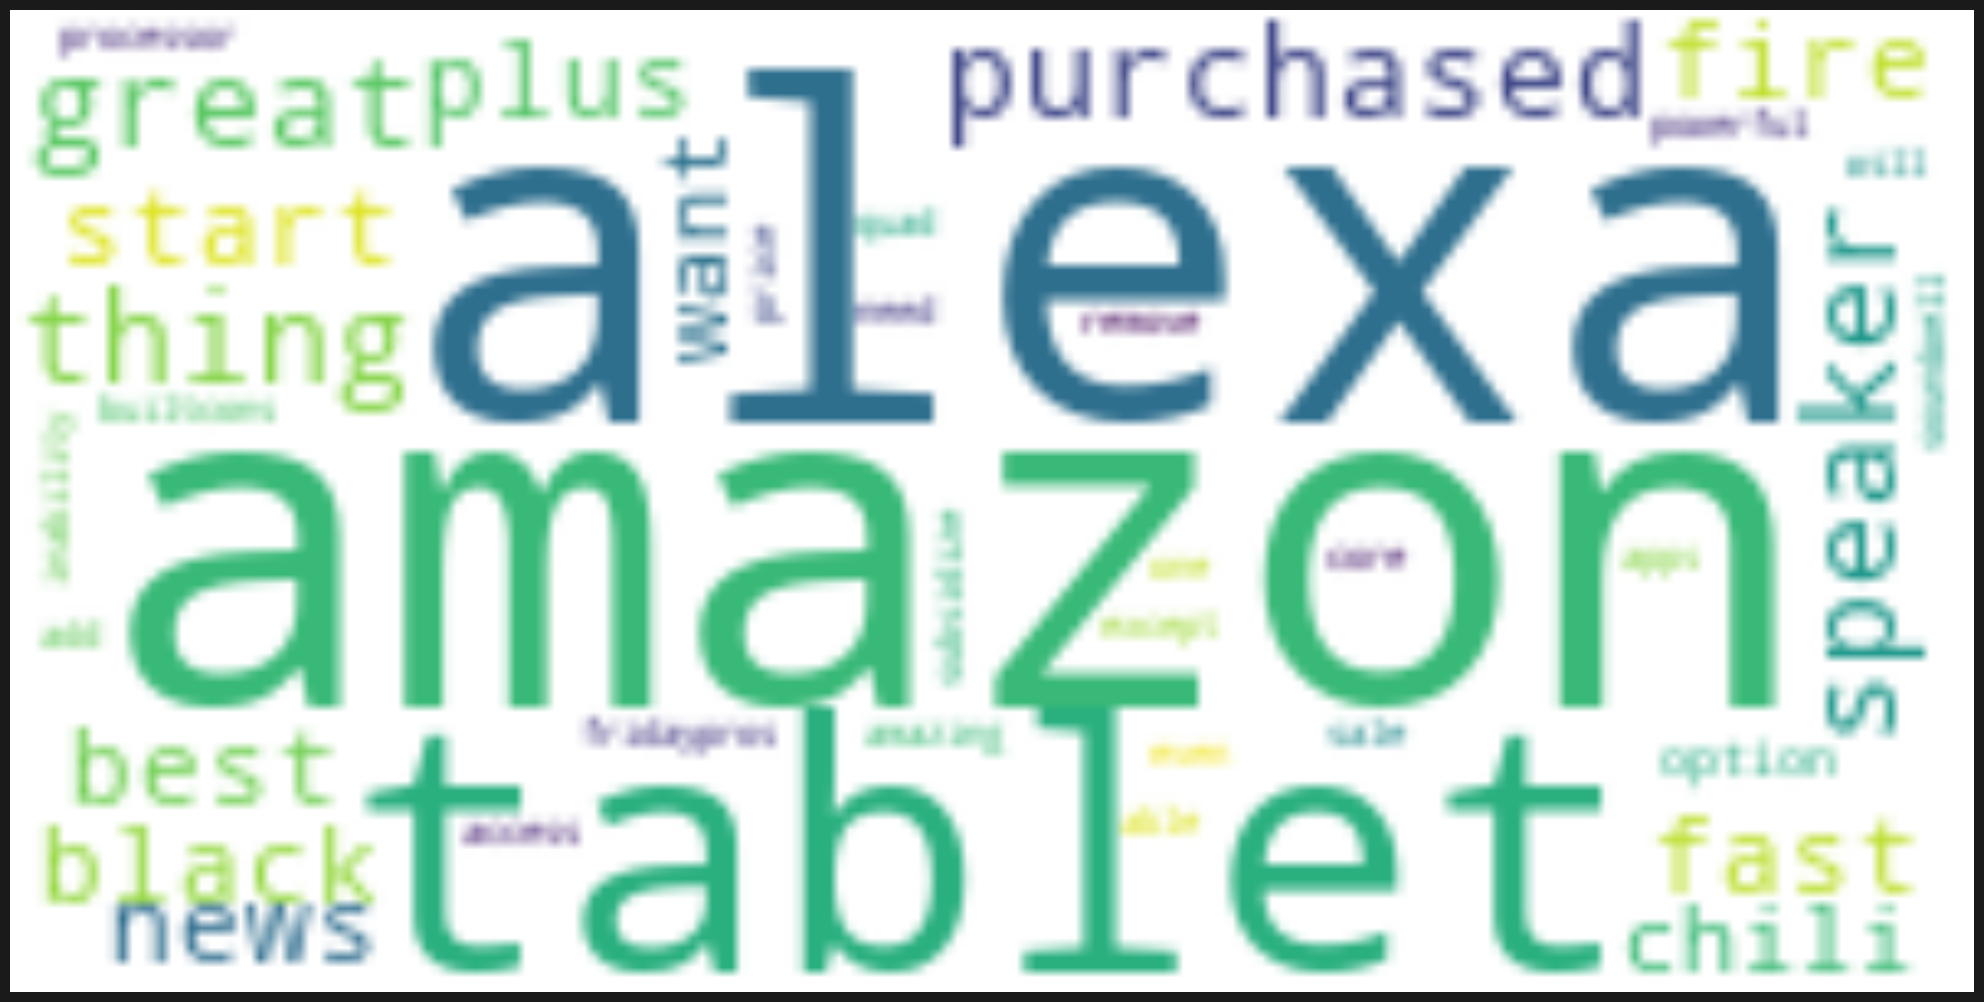

In [51]:
from wordcloud import WordCloud, STOPWORDS
txt = train["reviews_text"].values
wc = WordCloud(width=200, height=100, background_color="white", stopwords=STOPWORDS).generate(str(txt))
fig = plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [52]:
rf

NameError: name 'rf' is not defined

In [ ]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Vectorization: Convert reviews_text to Tf-Idf scores
vectorizer = TfidfVectorizer()

# Fit and transform the reviews_text into a tf-idf matrix
tfidf_matrix = vectorizer.fit_transform(train_data['reviews_text'])

In [ ]:
tfidf_matrix

In [ ]:
# Convert the resulting matrix to a DataFrame to view the features
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
# Display the first few rows of tfidf_features
tfidf_features.head(5)

In [ ]:
# Add TF_IDF features & Back to the dataset
train_data_tfidf = pd.concat([train_data.reset_index(drop=True),tfidf_features], axis=1)

In [ ]:
train_data_tfidf.head()

# Classifier Selection:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
gt

In [ ]:
# Split the data into training and test sets
X_train = train_data["reviews_text"]
X_test =  test_hidden_data["reviews_text"]
y_train = train_data["sentiment"]
y_test = test_hidden_data["sentiment"]

In [ ]:
# Converting reviews to vectors  using Tf-idf score
vectorizer_1 = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
vectorizer_1

# TFIDF Vectorizer

## ML Model with imbalanced dataset

## Naive Bayes classifier

In [ ]:
# Multinomial Naive Bayes classifyer with imbalanced data
mnb_model = MultinomialNB()
mnb_model.fit(tfidf_matrix.toarray(),y_train)

In [ ]:
# Model Performance (train_accuracy , test_accuracy)
train_accuracy = mnb_model.score(X_train_vec.toarray(), y_train)
test_accuracy = mnb_model.score(X_test_vec.toarray(), y_test)
print(f"MultinimialNB train score is {train_accuracy}, test score is {test_accuracy}")

In [ ]:
# Train prediction
train_predictions = mnb_model.predict(X_train_vec.toarray())
train_report = classification_report(y_train, train_predictions)
print("Train classification report\n", train_report)

In [ ]:
# Test prediction 
test_predictions = mnb_model.predict(X_test_vec.toarray())
test_report = classification_report(y_test, test_predictions)
print('Test classification report\n', test_report)

In [ ]:
imbalanced_test_pred = mnb_model.predict(X_test_vec.toarray())
imbalanced_test_pred[0:100]

### Observation

The bias in the dataset resulted in all predictions to be biased towards the majority class, hence there is need to balance the dataset

Failure to treat imbalanced dataset degrades the performance of the classifier model hence balancing the dataset is a necessity

# Tackling Class Imbalance:

## Checking class counts_

In [ ]:
class_counts = train_data['sentiment'].value_counts()
print(class_counts)

In [ ]:
# Visualization original class sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment', palette='Set2')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Addressing class imbalance with undersampling

In [ ]:
# Combining smote and undersampling using SmoteTomek technique 
smote = SMOTETomek()
x_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

In [ ]:
smote

### Note

Smotetomek algorithm is only applied to train data. The test data remain unchanged so that it represents the original data

In [ ]:
y_train_smote.value_counts()

In [ ]:
# Visualize the New distribution of sentiments after resampling
plt.figure(figsize=(8,6))
sns.countplot(x=y_train_smote, palette='Set2')
plt.title('Resampling Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Multinomial Naive Bayes classifyer with balanced data - SMOTTomek

In [ ]:
mnb_smt_model = MultinomialNB()
mnb_smt_model.fit(x_train_smote.toarray(),y_train_smote)

# Model performance 
train_smt_accuracy = mnb_smt_model.score(x_train_smote.toarray(), y_train_smote)
test_smt_accuracy = mnb_smt_model.score(X_test_vec.toarray(), y_test)
print(f"MultinomialNB train score for smt balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")

In [ ]:
# Test prediction 
smt_test_predictions = mnb_smt_model.predict(X_test_vec.toarray())
smt_test_report = classification_report(y_test, smt_test_predictions)
print('Test classification report\n', smt_test_report)

In [ ]:
balanced_test_pred = mnb_smt_model.predict(X_test_vec.toarray())
balanced_test_pred[0:100]

### Observations

Balancing the dataset enabled all the three sentiments (positive, negative and neutral) to be predicted in the model

# Evaluation Metrics:

In [ ]:
gf.

# Multi-class SVM and Neural Nets:

## Evaluate & Train SVM Model

In [ ]:
# Model building using SVM
svm_classifier = SVC()
svm_classifier.fit(x_train_smote.toarray(),y_train_smote)

# Model performance 
train_svm_accuracy = svm_classifier.score(x_train_smote.toarray(), y_train_smote)
test_svm_accuracy = svm_classifier.score(X_test_vec.toarray(), y_test)
print(f"SVM train score for balanced dataset is {train_svm_accuracy}, test score is {test_svm_accuracy}")

In [ ]:
# Test prediction 
balanced_test_predictions = svm_classifier.predict(X_test_vec.toarray())
balanced_test_report = classification_report(y_test, balanced_test_predictions)
print('Test classification report\n', balanced_test_report)

## Evaluate & Train Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [ ]:
# Standardize the features
nn_model = StandardScaler()
nn_model.fit(x_train_smote.toarray(),y_train_smote)

In [ ]:
# Build Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) 

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.summary()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_train_vec)
y_pred_classes = np.argmax(y_pred, axis=0)
y_test_classes = np.argmax(balanced_test_pred, axis=0)

In [ ]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test_classes, balanced_test_pred))
print("Classification Report:")
print(classification_report(y_test_classes, balanced_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, balanced_test_pred))

# Tree based models 


In [ ]:
# Model building using tree based models- Random Forest classifier balanced data
rcf_balanced_model = RandomForestClassifier()
rcf_balanced_model.fit(x_train_smote.toarray(),y_train_smote)
# Model performance 
train_smt_accuracy = rcf_balanced_model.score(x_train_smote.toarray(), y_train_smote)
test_smt_accuracy = rcf_balanced_model.score(X_test_vec.toarray(), y_test)
print(f"Random forest train score for balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")
print()
# Test prediction 
balanced_test_predictions = rcf_balanced_model.predict(X_test_vec.toarray())
balanced_test_report = classification_report(y_test, balanced_test_predictions)
print('Test classification report\n', balanced_test_report)

In [ ]:


# Initialize the label encoder
encoder = LabelEncoder()

# Fit and transform the labels into numeric format
y_numeric = encoder.fit_transform(y_train_smote)

# Now y_numeric will contain numeric values like [0, 1, 2]
print(y_numeric)


In [ ]:
# XGBoostClassifier with balanced data 
xgb_balanced_model = XGBClassifier()
xgb_balanced_model.fit(x_train_smote.toarray(), y_numeric)